# 手写字母XO数据预处理

## 概要

先尝试做一下分类，　通过卷积神经网络分类，然后完成Tic-Tac-Toe的游戏．

数据集可以来自于手写字母，提取字母中的`X`跟`O` .

## EMNIST数据集

https://www.nist.gov/node/1298471/emnist-dataset

需要其中的**EMNIST Letters: 145,600 characters. 26 balanced classes.**数据集

下载里面的gzip压缩包，只保留其中的`emnist-letters` 部分，手写字母数据集.

解压缩里面的`gz`后缀的压缩包，里面是二进制格式的训练集跟测试集以及标签数据．



![emnist-letters.png](./image/emnist-letters.png)


安装拓展包`mlxtend` 

```
sudo pip3 install mlxtend
```


## 载入数据集

In [2]:
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import numpy as np

# 标签数据的二进制文件路径
LABEL_FILE = "../../dataset/emnist-letters/emnist-letters-train-labels-idx1-ubyte";
# 图像数据的二进制文件路径
IMAGE_FILE = "../../dataset/emnist-letters/emnist-letters-train-images-idx3-ubyte";
# 载入训练集与标签
X, y = loadlocal_mnist(images_path=IMAGE_FILE,labels_path=LABEL_FILE)

X是一个长度为124800x784的矩阵，每一行就是一张图片对应的向量, 维度是(784,)

In [3]:
X.shape

(124800, 784)

## 显示样例数据集

如果你想可视化图像需要将向量转换为28x28的矩阵，接下来再把矩阵转置一下．

另外标签的范围是1-26, 代表`a`-`z` 26个字母．

z


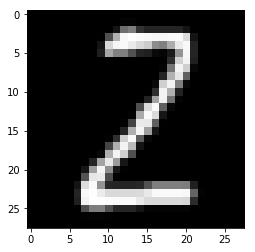

In [4]:
def array2img(x):
    '''将(784,)的向量转换为图片格式28*28'''
    x_img = x.reshape((28, 28))
    x_img = x_img.T
    return x_img

def num2letter(num):
    '''将标签数字转换为字母'''
    return chr(ord('a') + num - 1)

# 显示图片
plt.imshow(array2img(X[14]), cmap='gray')
print(num2letter(y[14]))

## 筛选数据


去除无关字符的测试集, 只保留`X`跟`O`对应的数据集还有标签，并将标签替换为0跟1

| 字母 | 标签 |
| ---- | ---- |
| O    | 0    |
| X    | 1    |

In [5]:
def letter2label(letter):
    return ord(letter) - ord('a') + 1

In [6]:
# 获取字母X跟O对应的序号
xo_indexs = np.where(np.logical_or(y==letter2label('o'), y==letter2label('x')))

In [7]:
xo_indexs

(array([     3,      9,     17, ..., 124742, 124748, 124798]),)

In [8]:
# 索引数据
X_train = X[xo_indexs]
y_train = y[xo_indexs]

In [9]:
# 标签转换为0,1
y_train = np.uint8(y_train == letter2label('x'))

## 转换为2D数据集
将原来的1维的数据重新转换为二维

In [17]:
image_list = []
for img_idx in range(len(X_train)):
    image_list.append(array2img(X_train[img_idx]).tolist())



In [30]:
# 训练集图片
train_images = np.array(image_list).astype('uint8')

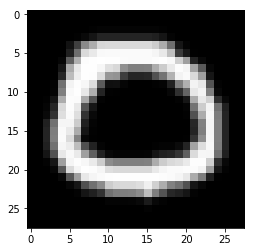

In [32]:
# 显示其中一个样例图片
plt.imshow(train_images[0], cmap='gray')

In [35]:
# 训练集的标签
train_labels = y_train

## 测试集执行相同操作


In [34]:
test_image_file = '../../dataset/emnist-letters/emnist-letters-test-images-idx3-ubyte'
test_label_file = '../../dataset/emnist-letters/emnist-letters-test-labels-idx1-ubyte'
X_test, y_test = loadlocal_mnist(images_path=test_image_file,labels_path=test_label_file)
xo_indexs = np.where(np.logical_or(y_test==letter2label('o'), y_test==letter2label('x')))
X_test = X_test[xo_indexs]
y_test = y_test[xo_indexs]
y_test = np.uint8(y_test == letter2label('x'))
image_list = []
for img_idx in range(len(X_test)):
    image_list.append(array2img(X_test[img_idx]).tolist())
test_images = np.array(image_list).astype('uint8')
test_labels = y_test

## 序列化保存数据

In [36]:
import pickle

In [37]:
# 创建一个字典格式的数据集
dataset = {
    'train_images': train_images,
    'train_labels': train_labels,
    'test_images': test_images,
    'test_labels': test_labels
}

In [40]:
# 序列化保存在文件
with open('../../common/xo_dataset.bin', 'wb') as f:
    pickle.dump(dataset, f)

## 导出部分测试图片

In [39]:
import cv2
#导出测试数据集
for i in range(20):
    cv2.imwrite('../../common/test_dataset/test_{}.png'.format(i), test_images[i])